# COURSE:   PGP [AI&ML]

## Learner :  Chaitanya Kumar Battula
## Module  : Machine Learning
## Topic   : Linear Regression_Boston Homes-1

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Import Dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
df = pd.DataFrame(boston.data)
df.shape

(506, 13)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df.columns = ['CRIM','ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']

In [9]:
df['HOUSING_VALUE'] = boston.target


In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HOUSING_VALUE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HOUSING_VALUE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


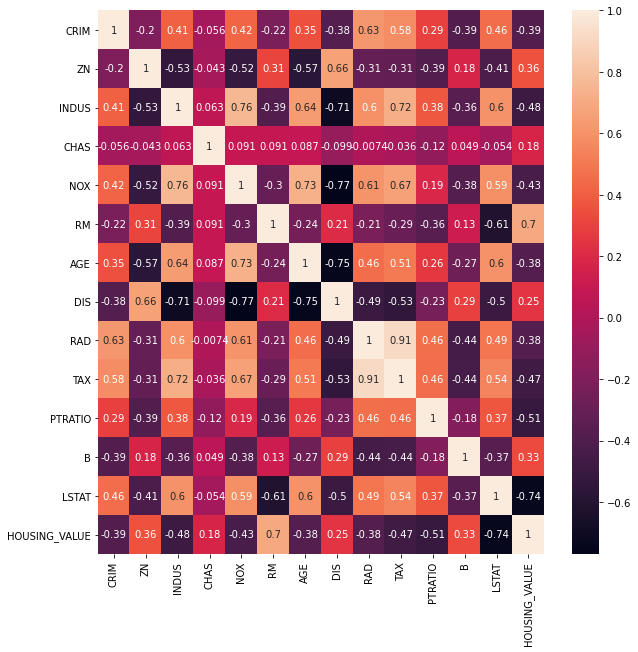

In [23]:
fig_size = (6, 4)
fig, ax = plt.subplots(figsize=(10,10) )


sns.heatmap(df.corr(),  ax=ax, annot=True)

In [12]:
# Creating train and test dataset

x_train = df.drop(['HOUSING_VALUE'], axis=1)
y_train = df['HOUSING_VALUE']


from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_train,y_train,test_size=0.3,random_state=42)


# Model Building
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs = -1)
model.fit(xtrain,ytrain)

print(model.intercept_)
print(model.coef_)
print(df.columns.values.tolist())
list(zip(df.columns,model.coef_))




31.63108403569186
[-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'HOUSING_VALUE']


[('CRIM', -0.13347010285294725),
 ('ZN', 0.03580891359323623),
 ('INDUS', 0.049522645220052244),
 ('CHAS', 3.119835116285423),
 ('NOX', -15.417060895306776),
 ('RM', 4.057199231645376),
 ('AGE', -0.010820835184924181),
 ('DIS', -1.3859982431608782),
 ('RAD', 0.24272733982225161),
 ('TAX', -0.008702234365661957),
 ('PTRATIO', -0.9106852081102905),
 ('B', 0.011794115892575245),
 ('LSTAT', -0.5471133128239536)]

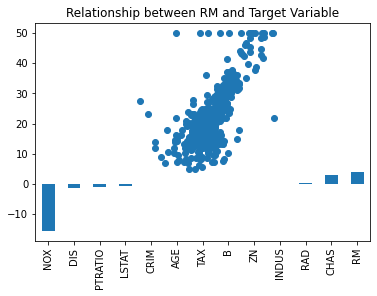

In [13]:
#Checking the magnitude of coefficients

predictors = df.columns[:-1]
coef = pd.Series(model.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

plt.scatter(df.RM,df.HOUSING_VALUE)
plt.title("Relationship between RM and Target Variable")
plt.show()



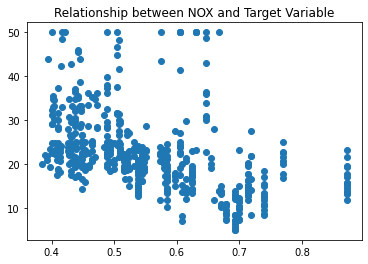

R2 Value/Coefficient of Determination: 0.7112260057484903


In [14]:
plt.scatter(df.NOX,df.HOUSING_VALUE)
plt.title("Relationship between NOX and Target Variable")
plt.show()
print('R2 Value/Coefficient of Determination: {}'.format(model.score(xtest, ytest)))


# Final prediction
plt.scatter(ytrain,model.predict(xtrain))
print(sqrt(mean_squared_error(ytrain, model.predict(xtrain))))
plt.scatter(ytest,model.predict(xtest))
print(sqrt(mean_squared_error(ytest, model.predict(xtest))))
pd.DataFrame({'Actual': ytest, 'Predicted': model.predict(xtest)}).head(10)

In [21]:
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(ytest, model.predict(xtest))))
pd.DataFrame({'Actual': ytest, 'Predicted': model.predict(xtest)}).head(10)



4.6386899261728445


,Actual,Predicted
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


4.748208239685937


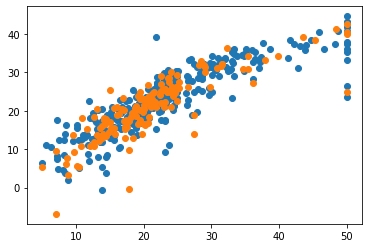

In [22]:
# Final prediction
plt.scatter(ytrain,model.predict(xtrain))
print(np.sqrt(mean_squared_error(ytrain, model.predict(xtrain))))

plt.scatter(ytest,model.predict(xtest))

